# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
sqlite_db = '/Users/Rebecca/DSI-projects/curriculum/week05/1.4-lab-sqlite-salary/assets/datasets/adult.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()
import matplotlib.pyplot as plt
import numpy as np
from bokeh import mpl
from bokeh.plotting import output_file, show

import pandas as pd
import plotly as py
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score

### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [2]:
c.execute('SELECT name FROM sqlite_master WHERE type = "table"').fetchall()

[(u'SELECT * FROM adult;',), (u'adult',)]

In [3]:
x = sql.read_sql('SELECT * FROM adult', con = conn)

In [4]:
x.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [5]:
x.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

In [6]:
x.dropna(how = 'any', axis = 0, inplace = True)

## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [7]:
pd.concat([x.drop('salary',axis=1),pd.get_dummies(x['salary'])], axis = 1)   
x['salary'] = x['salary'].apply(lambda x: x.replace('<=50K', '0'))
x['salary'] = x['salary'].apply(lambda x: x.replace('>50K', '1'))

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

In [8]:
x.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

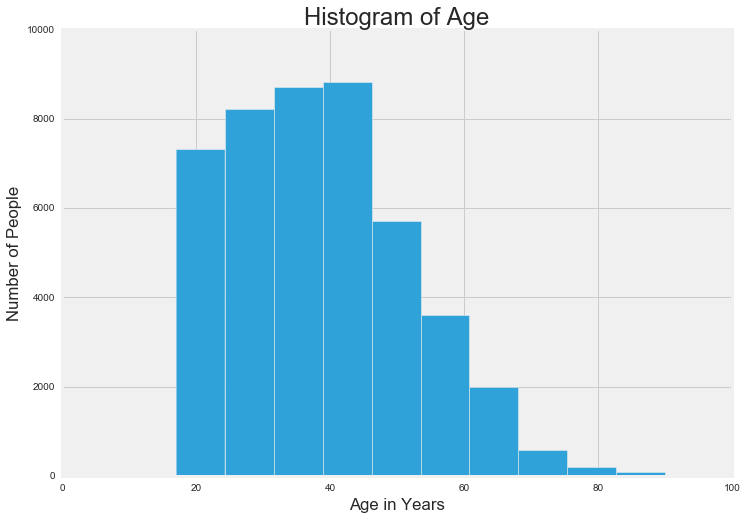

In [9]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x['age'])

plt.title('Histogram of Age', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('Age in Years')

plt.xlim([0,100])
plt.ylim([0,10000])

plt.show()

In [10]:
x[x['salary'] == '0']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,0


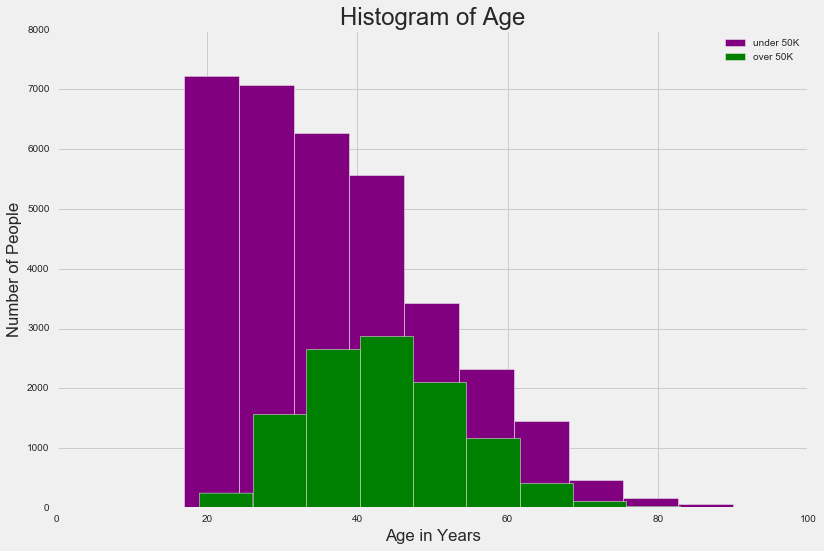

In [11]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x[x['salary'] == '0']['age'], color = 'purple', label = 'under 50K')

plt.hist(x[x['salary'] == '1']['age'], color = 'green', label = 'over 50K')
plt.title('Histogram of Age', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('Age in Years')


plt.legend(loc='upper right')
plt.xlim([0,100])
plt.ylim([0,8000])

plt.show()

In [14]:
x['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

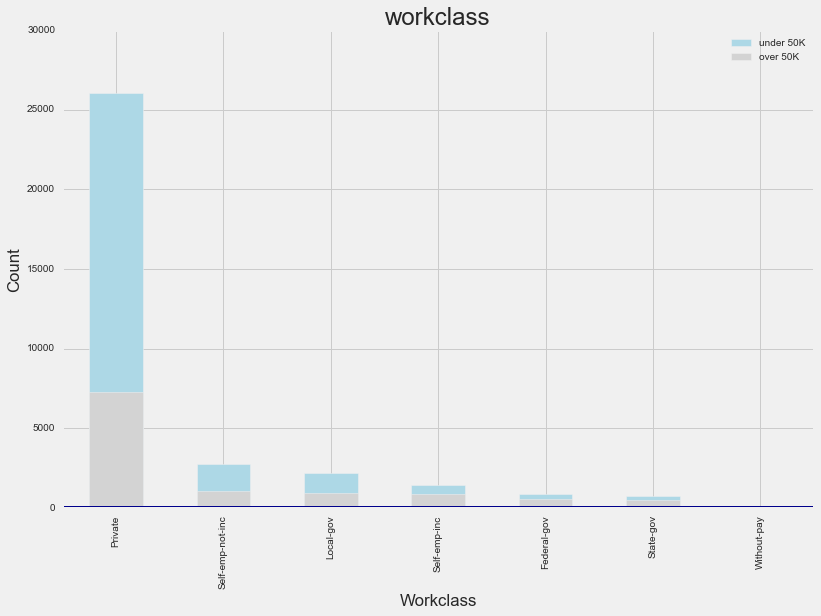

In [24]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['workclass'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['workclass'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('workclass', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('Workclass')

plt.legend(loc='upper right')

plt.show()

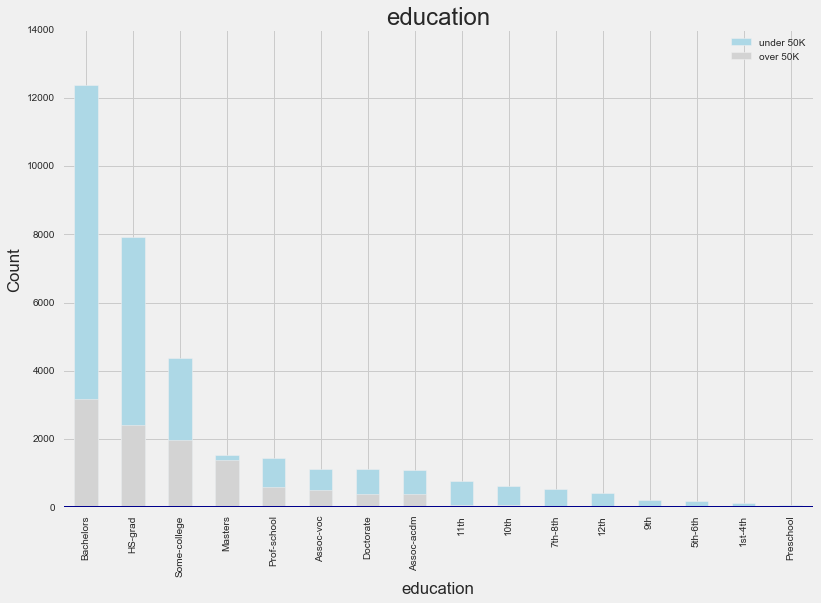

In [25]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['education'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['education'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('education', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('education')

plt.legend(loc='upper right')

plt.show()

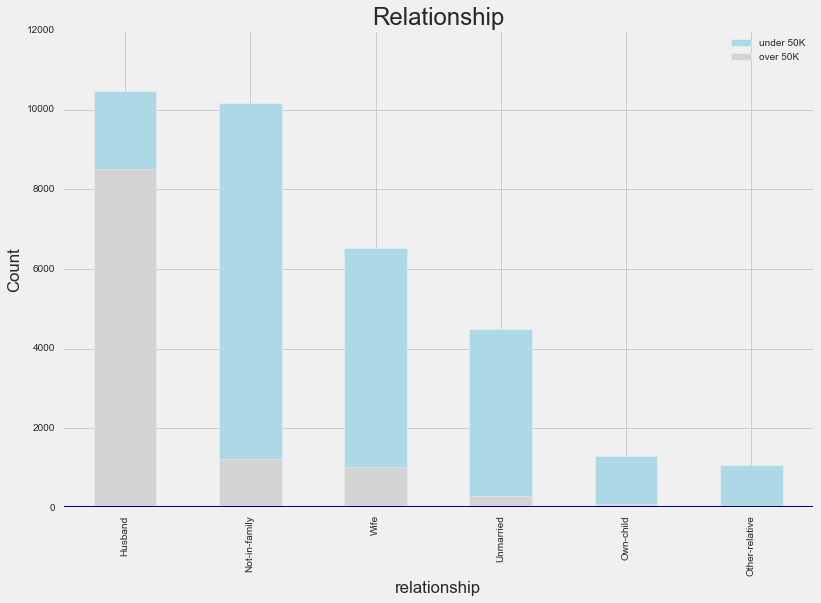

In [29]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['relationship'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['relationship'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('Relationship', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('relationship')

plt.legend(loc='upper right')

plt.show()

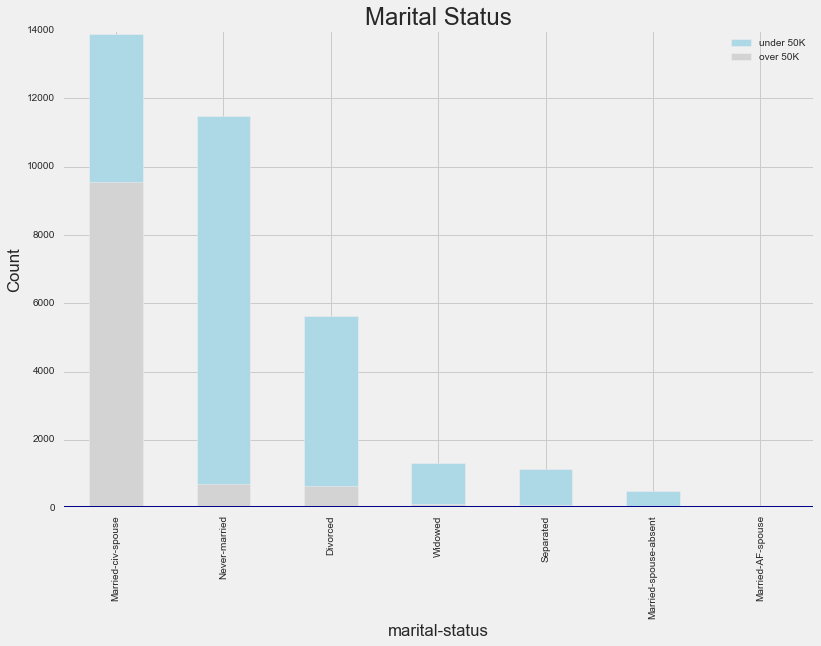

In [30]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['marital-status'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['marital-status'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('Marital Status', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('marital-status')

plt.legend(loc='upper right')

plt.show()

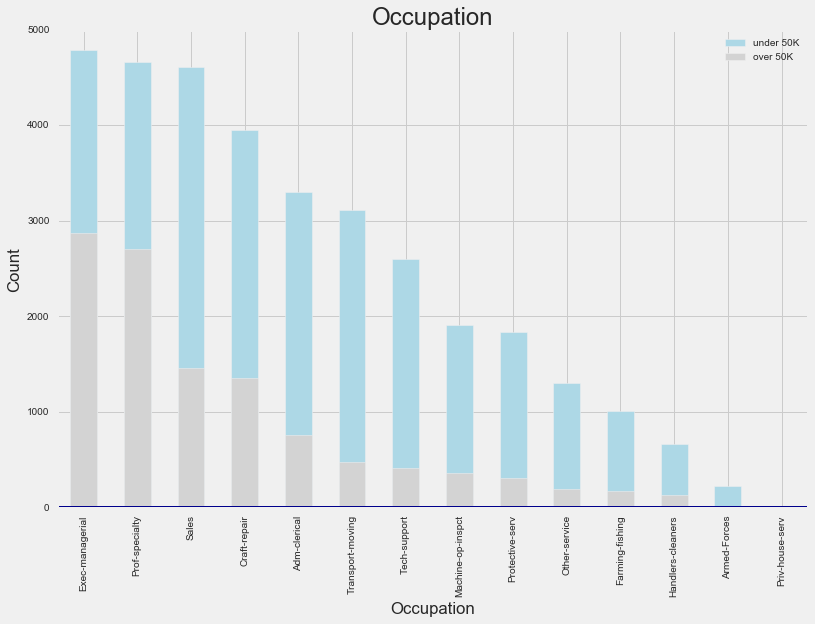

In [31]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['occupation'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['occupation'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('Occupation', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('Occupation')

plt.legend(loc='upper right')

plt.show()

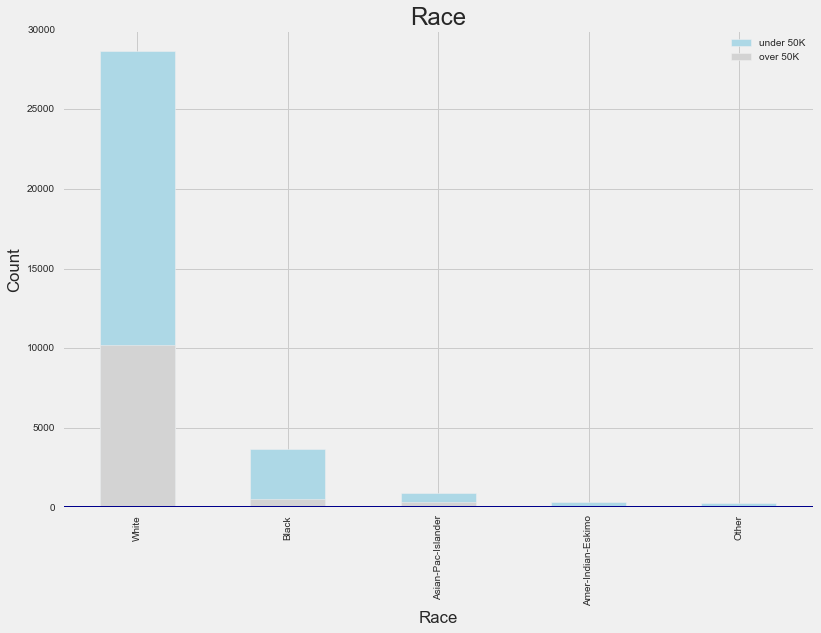

In [32]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['race'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K') 

x[x['salary'] == '1']['race'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K') 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('Race', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('Race')

plt.legend(loc='upper right')

plt.show()

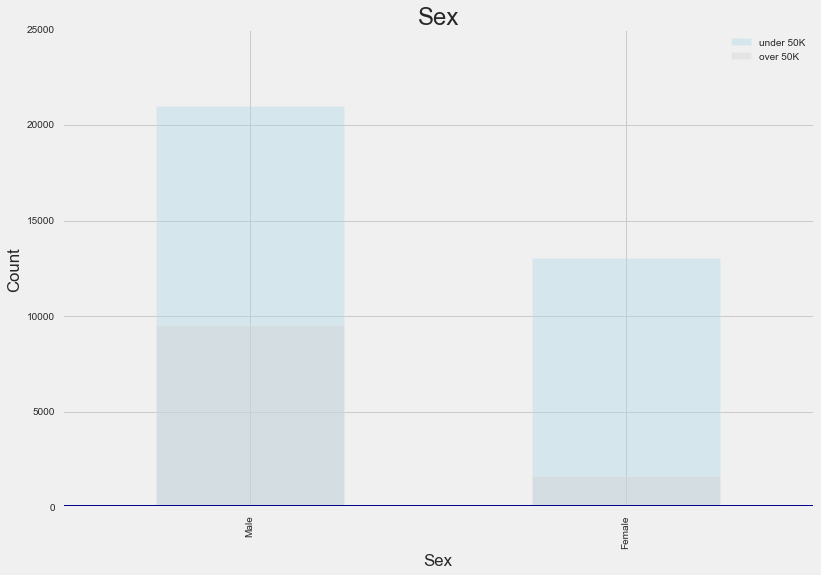

In [48]:
plt.figure(figsize = (12,8))

x[x['salary'] == '0']['sex'].value_counts().plot(kind = 'bar', color = 'lightblue', label = 'under 50K', alpha = 0.4) 

x[x['salary'] == '1']['sex'].value_counts().plot(kind = 'bar', color = 'lightgrey', label = 'over 50K', alpha = 0.4) 

plt.axhline(0, color='darkblue')

plt.style.use('fivethirtyeight')

plt.title('Sex', fontsize = 24)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('Sex')

plt.legend(loc='upper right')

plt.show()

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

In [37]:
x.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

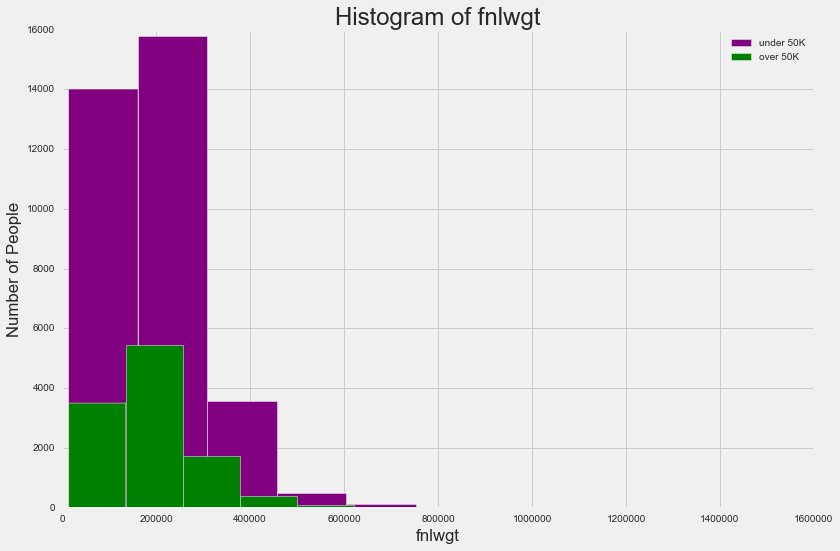

In [40]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x[x['salary'] == '0']['fnlwgt'], color = 'purple', label = 'under 50K')

plt.hist(x[x['salary'] == '1']['fnlwgt'], color = 'green', label = 'over 50K')
plt.title('Histogram of fnlwgt', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('fnlwgt')


plt.legend(loc='upper right')
#plt.xlim([0,100])
#plt.ylim([0,8000])

plt.show()

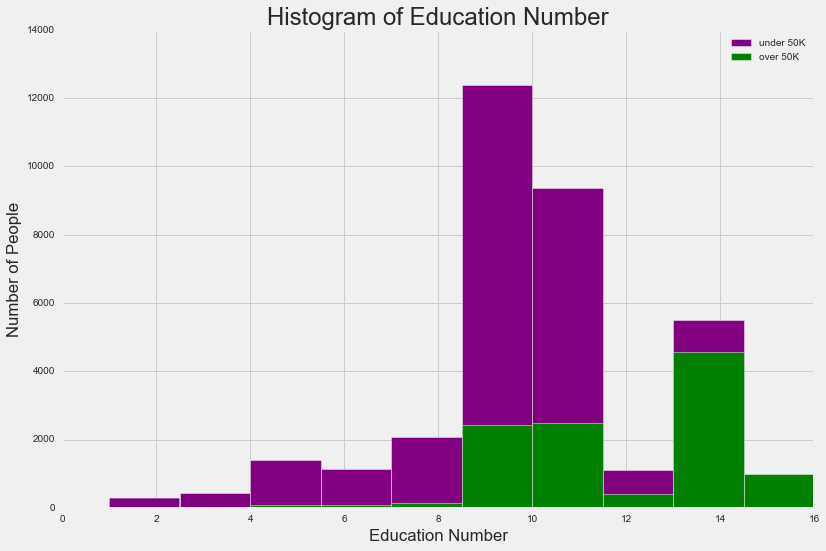

In [43]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x[x['salary'] == '0']['education-num'], color = 'purple', label = 'under 50K')

plt.hist(x[x['salary'] == '1']['education-num'], color = 'green', label = 'over 50K')
plt.title('Histogram of Education Number', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('Education Number')


plt.legend(loc='upper right')
#plt.xlim([0,100])
#plt.ylim([0,8000])

plt.show()

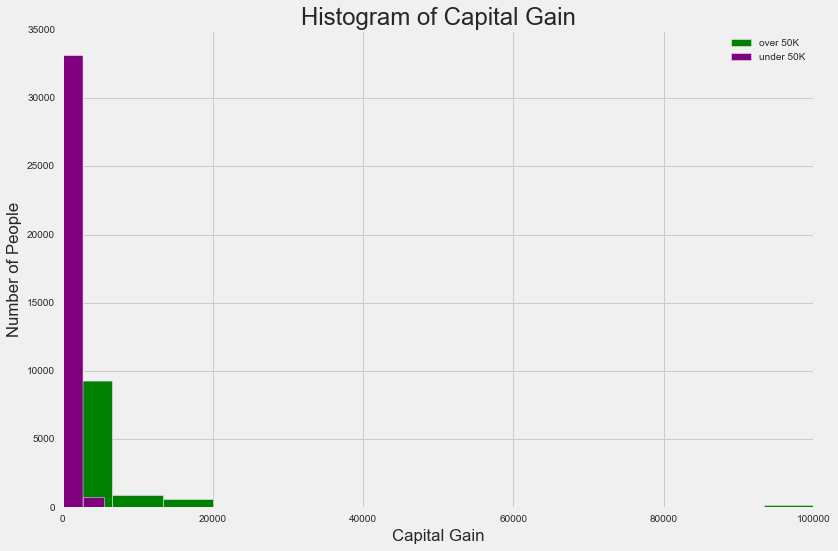

In [46]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x[x['salary'] == '1']['capital-gain'], color = 'green', label = 'over 50K', bins = 15)
plt.hist(x[x['salary'] == '0']['capital-gain'], color = 'purple', label = 'under 50K', bins = 15)


plt.title('Histogram of Capital Gain', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('Capital Gain')


plt.legend(loc='upper right')
#plt.xlim([0,100])
#plt.ylim([0,8000])

plt.show()

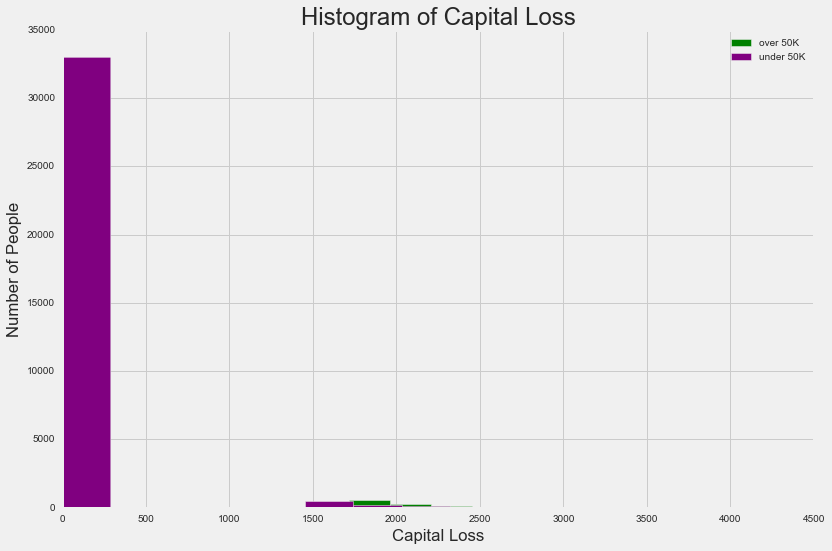

In [47]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(x[x['salary'] == '1']['capital-loss'], color = 'green', label = 'over 50K', bins = 15)
plt.hist(x[x['salary'] == '0']['capital-loss'], color = 'purple', label = 'under 50K', bins = 15)


plt.title('Histogram of Capital Loss', fontsize = 24)

# y label
plt.ylabel('Number of People')

# x label
plt.xlabel('Capital Loss')


plt.legend(loc='upper right')
#plt.xlim([0,100])
#plt.ylim([0,8000])

plt.show()

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams
